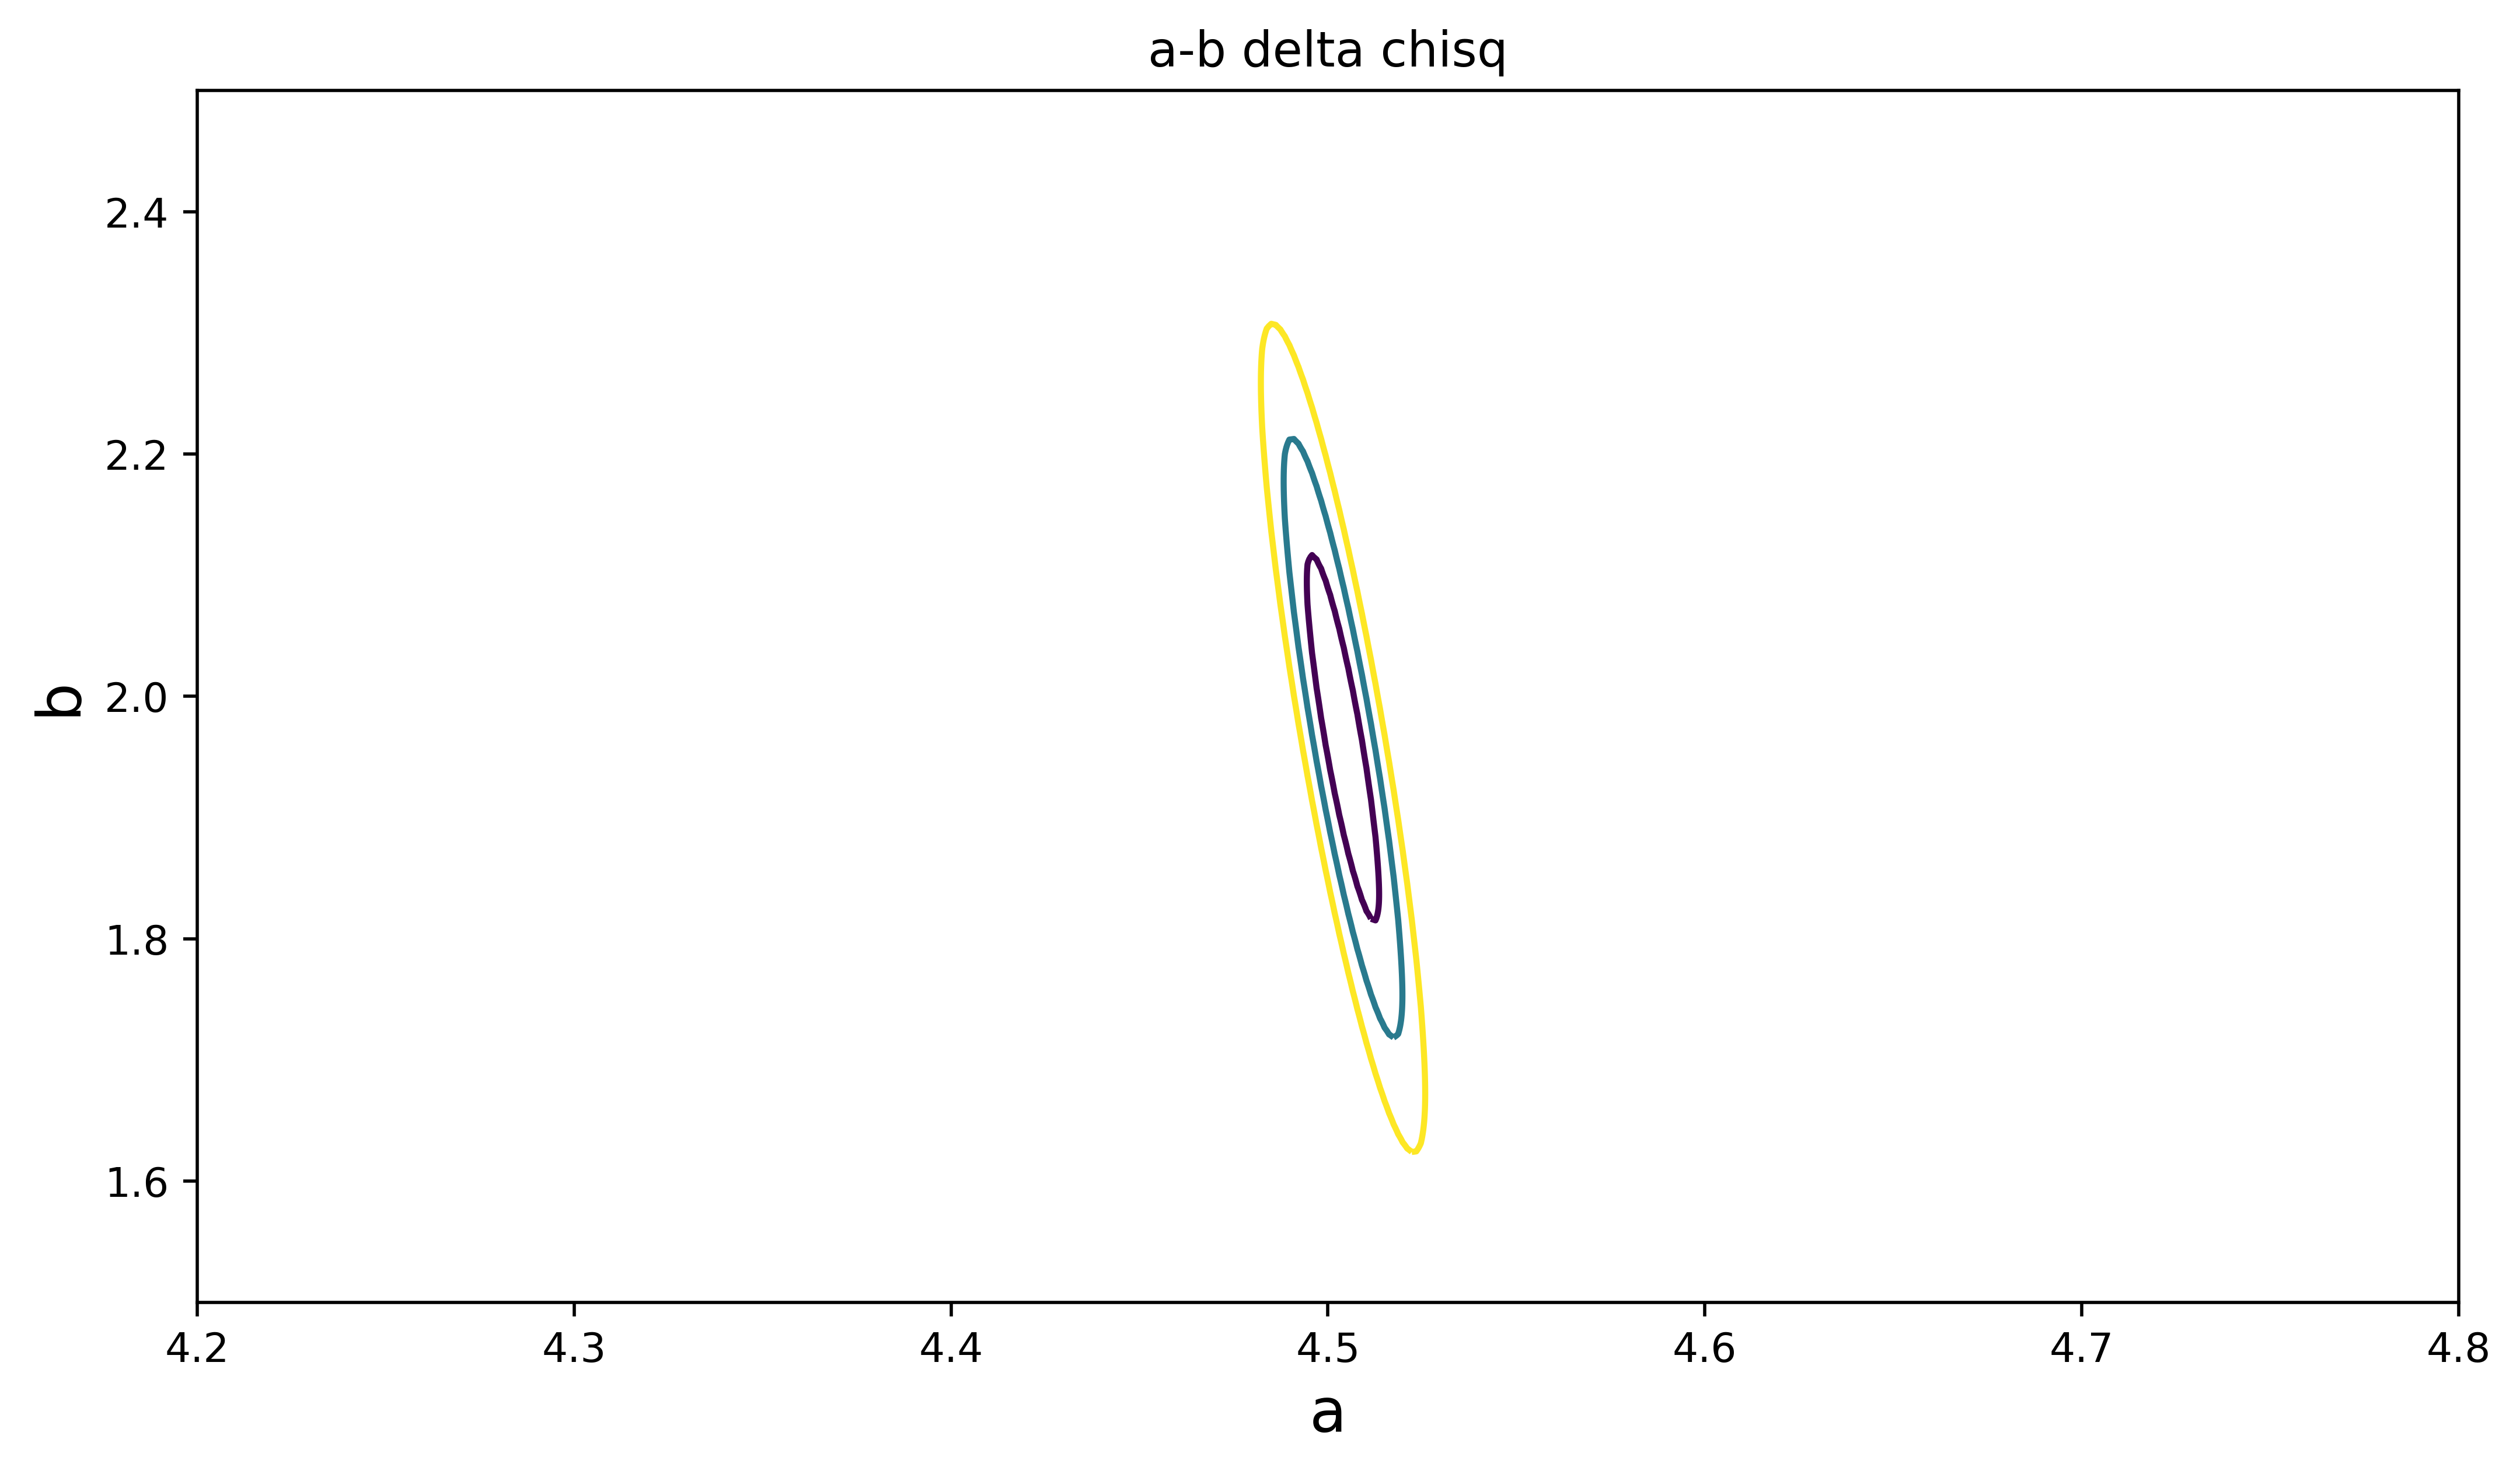

In [4]:
import pandas as pd
import numpy as np
from numpy import *
import numpy.random as nprd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import corner
import numpy.random as nprd

file1="E:/python/MDC_data_part_1.txt"
part1data=pd.read_csv(file1,header=None,sep='    ',engine='python')
part1data.columns=['x','y']
x=np.array(part1data['x'])
y=np.array(part1data['y'])
file2="E:/python/MDC_data_part_2.txt"
part2data=pd.read_csv(file2,header=None,sep='    ',engine='python')
part2data.columns=['x','y']
x2=np.array(part2data['x'])
y2=np.array(part2data['y'])

def linearfunc(x,a,b):
    return a+b*x
def quadraticfunc(x,a,b,c):
    return a+b*x+c*x**2
def stand_regres(x_mat, y_mat):
    x_mat_T = x_mat.T * x_mat
    reg_coef = linalg.solve(x_mat_T, x_mat.T * y_mat)  # 也可根据numpy中linalg模块中solve方法解ax + b = 0得到回归系数
    return reg_coef

popt,pcov=curve_fit(linearfunc,x,y)#直接使用scipy自带的最小二乘法拟合函数curvefit做线性回归
perr = np.sqrt(np.diag(pcov))
sigma=np.sqrt(np.var(y-linearfunc(x,popt[0],popt[1])))
##Define sigma and range and nunmber of trial parameters for a and b

a = np.linspace(4.2,4.8,500)
b = np.linspace(1.5,2.5,500)

##Calculate chi-squared for trial parameters
chisq = np.zeros((len(a),len(b)))

for i in range(0,len(a)):
    for j in range(0,len(b)):
         chisq[i,j]=np.sum(((a[i]+x*b[j]-y)/sigma)**2)
##Calculate delchisq
chisqmin = np.amin(chisq)
delchisq = chisq - chisqmin
##Create and plot contours

fig, ax = plt.subplots(figsize=(10,5.5),dpi=500)
cont = [2.3, 6.17,11.8]
ax.contour(a,b,delchisq,cont)
ax.set_title('a-b delta chisq')
ax.set_xlabel("a",size=15)
ax.set_ylabel("b",size=15)
fig.savefig("E:/python/MDC_data_part_1_Likelyhood.png",dpi=500)
plt.show()